### 1. Berliana Shafa Wardani (1301194181)
### 2. Mayang Sari (1301194227)

In [2]:
pip install niapy

Note: you may need to restart the kernel to use updated packages.


In [98]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score
import seaborn as sns

In [84]:
df_train = pd.read_csv('boston_train.csv')
df_test = pd.read_csv('boston_test.csv')

In [85]:
df_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.40771,0.0,6.20,1,0.5070,6.164,91.3,3.0480,8,307,17.4,395.24,21.46,21.7
1,19.60910,0.0,18.10,0,0.6710,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
2,6.71772,0.0,18.10,0,0.7130,6.749,92.6,2.3236,24,666,20.2,0.32,17.44,13.4
3,1.51902,0.0,19.58,1,0.6050,8.375,93.9,2.1620,5,403,14.7,388.45,3.32,50.0
4,9.59571,0.0,18.10,0,0.6930,6.404,100.0,1.6390,24,666,20.2,376.11,20.31,12.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224,14.7,390.55,2.88,50.0
400,0.04981,21.0,5.64,0,0.4390,5.998,21.4,6.8147,4,243,16.8,396.90,8.43,23.4
401,0.08199,0.0,13.92,0,0.4370,6.009,42.3,5.5027,4,289,16.0,396.90,10.40,21.7
402,0.37578,0.0,10.59,1,0.4890,5.404,88.6,3.6650,4,277,18.6,395.24,23.98,19.3


In [86]:
df_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
1,0.14866,0.0,8.56,0,0.5200,6.727,79.9,2.7778,5,384,20.9,394.76,9.42,27.5
2,25.04610,0.0,18.10,0,0.6930,5.987,100.0,1.5888,24,666,20.2,396.90,26.77,5.6
3,3.67367,0.0,18.10,0,0.5830,6.312,51.9,3.9917,24,666,20.2,388.62,10.58,21.2
4,9.51363,0.0,18.10,0,0.7130,6.728,94.1,2.4961,24,666,20.2,6.68,18.71,14.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.06211,40.0,1.25,0,0.4290,6.490,44.4,8.7921,1,335,19.7,396.90,5.98,22.9
98,0.06911,45.0,3.44,0,0.4370,6.739,30.8,6.4798,5,398,15.2,389.71,4.69,30.5
99,0.09252,30.0,4.93,0,0.4280,6.606,42.2,6.1899,6,300,16.6,383.78,7.37,23.3
100,0.26363,0.0,8.56,0,0.5200,6.229,91.2,2.5451,5,384,20.9,391.23,15.55,19.4


# EDA

In [88]:
print("df_train: ",df_train.shape)
print("df_test: ",df_test.shape)

df_train:  (404, 14)
df_test:  (102, 14)


In [89]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     404 non-null    float64
 1   ZN       404 non-null    float64
 2   INDUS    404 non-null    float64
 3   CHAS     404 non-null    int64  
 4   NOX      404 non-null    float64
 5   RM       404 non-null    float64
 6   AGE      404 non-null    float64
 7   DIS      404 non-null    float64
 8   RAD      404 non-null    int64  
 9   TAX      404 non-null    int64  
 10  PTRATIO  404 non-null    float64
 11  B        404 non-null    float64
 12  LSTAT    404 non-null    float64
 13  PRICE    404 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 44.3 KB


In [90]:
df_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.423852,10.818069,11.168911,0.071782,0.556195,6.278074,68.979455,3.724405,9.551980,407.712871,18.458911,353.866139,12.768267,22.409901
std,8.197229,23.061649,6.798110,0.258447,0.116187,0.691061,27.692028,1.983793,8.741662,169.344926,2.152993,95.592190,7.170852,8.940920
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000,6.300000
25%,0.082598,0.000000,5.190000,0.000000,0.453000,5.888000,45.800000,2.110500,4.000000,278.500000,17.400000,374.527500,7.135000,17.175000
50%,0.260420,0.000000,9.690000,0.000000,0.538000,6.198500,77.150000,3.207450,5.000000,330.000000,19.000000,391.880000,11.675000,20.950000
75%,3.694070,3.125000,18.100000,0.000000,0.624000,6.616500,93.900000,5.104475,24.000000,666.000000,20.200000,396.285000,16.605000,25.000000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,10.585700,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Cek data yang duplikat

In [91]:
df_train[df_train.duplicated(keep=False)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


In [92]:
df_test[df_test.duplicated(keep=False)]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE


## Cek Outlier

<AxesSubplot:>

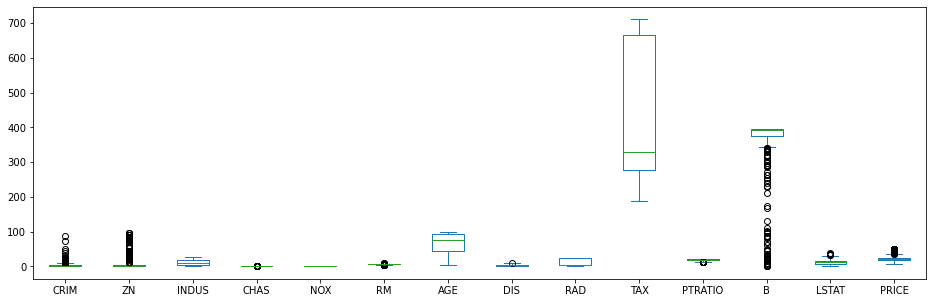

In [93]:
df_train.plot(kind='box', figsize=(16,5))

<AxesSubplot:>

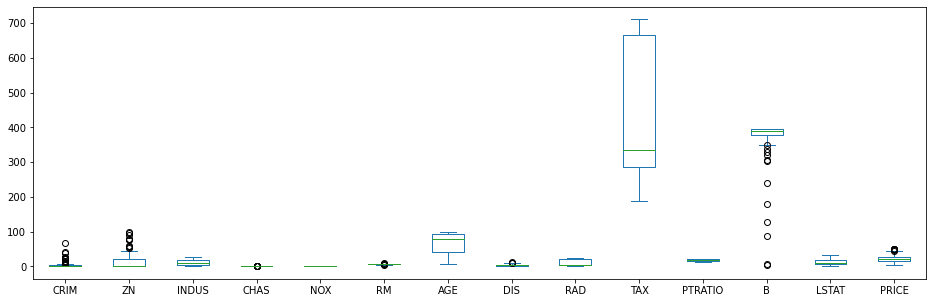

In [94]:
df_test.plot(kind='box', figsize=(16,5))

## Remove Outlier

<AxesSubplot:>

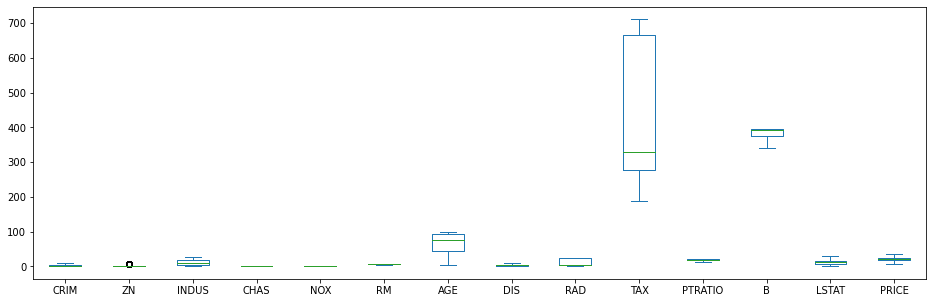

In [95]:
# df_train
# remove outlier
# check and remove outliers
p25 = df_train.quantile(0.25)
p75 = df_train.quantile(0.75) # atas
iqr = p75 - p25
upper_bound = p75 + 1.5 * iqr
lowq_bound = p25 - 1.5 * iqr
# finding outliers
df_train[df_train > upper_bound]
df_train[df_train < lowq_bound]
# trimming(pangkas)
new_df = df_train[df_train < upper_bound]
# capping(batas)
new_df_cap_train = df_train.copy()
new_df_cap_train = np.where(new_df_cap_train > upper_bound,
                               upper_bound, np.where(new_df_cap_train < lowq_bound,
                                                     lowq_bound, new_df_cap_train))
# convert array to dataframe
df_train = pd.DataFrame(new_df_cap_train, columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD',
                                                     'TAX','PTRATIO','B','LSTAT','PRICE'])

df_train.plot(kind='box', figsize=(16,5))

<AxesSubplot:>

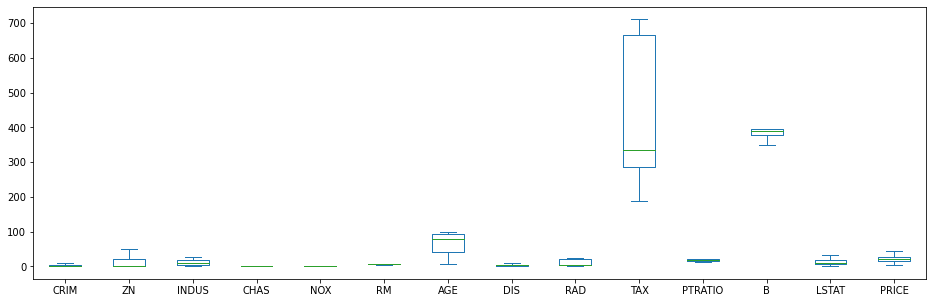

In [96]:
# df_train
# remove outlier
# check and remove outliers
p25 = df_test.quantile(0.25)
p75 = df_test.quantile(0.75) # atas
iqr = p75 - p25
upper_bound = p75 + 1.5 * iqr
lowq_bound = p25 - 1.5 * iqr
# finding outliers
df_test[df_test > upper_bound]
df_test[df_test < lowq_bound]
# trimming(pangkas)
new_df = df_test[df_test < upper_bound]
# capping(batas)
new_df_cap_test = df_test.copy()
new_df_cap_test = np.where(new_df_cap_test > upper_bound,
                               upper_bound, np.where(new_df_cap_test < lowq_bound,
                                                     lowq_bound, new_df_cap_test))
# convert array to dataframe
df_test = pd.DataFrame(new_df_cap_test, columns = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD',
                                                     'TAX','PTRATIO','B','LSTAT','PRICE'])

df_test.plot(kind='box', figsize=(16,5))

## Cek korelasi

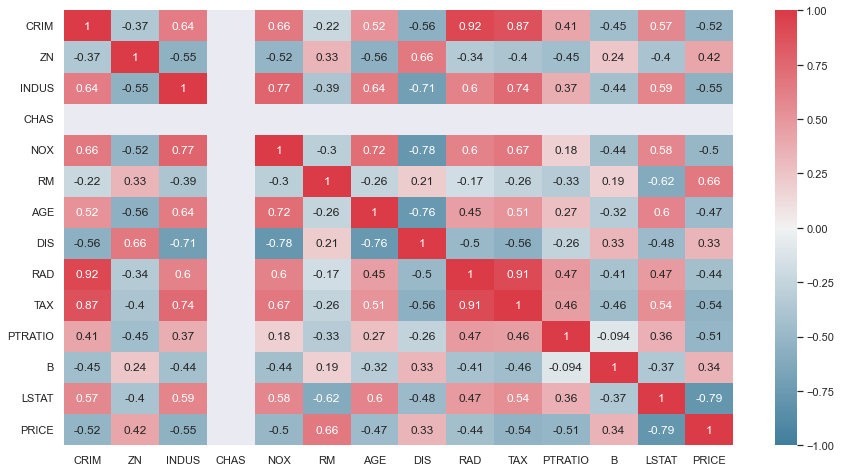

In [100]:
sns.set(rc={'figure.figsize':(15,8)})
cmap = sns.diverging_palette(230, 10, as_cmap=True)
heatmap = sns.heatmap(df_train.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)

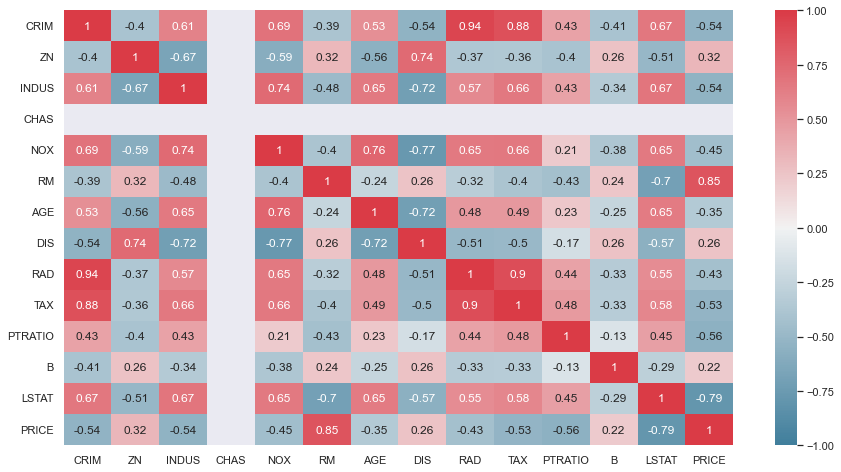

In [101]:
sns.set(rc={'figure.figsize':(15,8)})
cmap = sns.diverging_palette(230, 10, as_cmap=True)
heatmap = sns.heatmap(df_test.corr(), vmin=-1, vmax=1, annot=True, cmap=cmap)

# Preprocessing

## Drop kolom 

In [102]:
# drop data yang tidak penting
# chas, dis, b, zn
dropColumns = ['CHAS','DIS','B','ZN']

df_test.drop(dropColumns, axis=1, inplace=True)
df_train.drop(dropColumns, axis=1, inplace=True)

In [103]:
df_train.head()

,CRIM,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.407710,6.20,0.507,6.16400,91.3,8.0,307.0,17.4,21.46,21.7000
1,9.111279,18.10,0.671,7.31300,97.9,24.0,666.0,20.2,13.44,15.0000
2,6.717720,18.10,0.713,6.74900,92.6,24.0,666.0,20.2,17.44,13.4000
3,1.519020,19.58,0.605,7.70925,93.9,5.0,403.0,14.7,3.32,36.7375
4,9.111279,18.10,0.693,6.40400,100.0,24.0,666.0,20.2,20.31,12.1000


In [104]:
df_test.head()

,CRIM,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.01951,1.38,0.4161,7.104,59.5,3.0,216.0,18.6,8.05,33.0
1,0.14866,8.56,0.5200,6.727,79.9,5.0,384.0,20.9,9.42,27.5
2,8.47822,18.10,0.6930,5.987,100.0,24.0,666.0,20.2,26.77,5.6
3,3.67367,18.10,0.5830,6.312,51.9,24.0,666.0,20.2,10.58,21.2
4,8.47822,18.10,0.7130,6.728,94.1,24.0,666.0,20.2,18.71,14.9


## Normalisasi

In [105]:
# normalisasi untuk menyesuaikan data dalam rentang/range 0 -1, minmax 
def normalize(values):
    return (values - values.min())/(values.max() - values.min())

In [106]:
df_train = df_train.apply(normalize)
df_train

,CRIM,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.044085,0.210411,0.251029,0.469715,0.910402,0.304348,0.227533,0.477273,0.678473,0.505955
1,1.000000,0.646628,0.588477,0.864019,0.978373,1.000000,0.913958,0.795455,0.402682,0.285832
2,0.737115,0.646628,0.674897,0.670470,0.923790,1.000000,0.913958,0.795455,0.540234,0.233265
3,0.166140,0.700880,0.452675,1.000000,0.937178,0.173913,0.411090,0.170455,0.054677,1.000000
4,1.000000,0.646628,0.633745,0.552076,1.000000,1.000000,0.913958,0.795455,0.638927,0.190554
...,...,...,...,...,...,...,...,...,...,...
399,0.001512,0.081378,0.063992,1.000000,0.298661,0.130435,0.068834,0.170455,0.039546,1.000000
400,0.004777,0.189883,0.111111,0.412749,0.190525,0.130435,0.105163,0.409091,0.230399,0.561807
401,0.008311,0.493402,0.106996,0.416524,0.405767,0.130435,0.193117,0.318182,0.298143,0.505955
402,0.040578,0.371334,0.213992,0.208905,0.882595,0.130435,0.170172,0.613636,0.765131,0.427105


In [107]:
df_test = df_test.apply(normalize)
df_test

,CRIM,INDUS,NOX,RM,AGE,RAD,TAX,PTRATIO,LSTAT,PRICE
0,0.001010,0.004908,0.056224,0.744759,0.569149,0.086957,0.055344,0.622222,0.202266,0.697602
1,0.016263,0.275953,0.271784,0.631033,0.786170,0.173913,0.375954,0.877778,0.247917,0.560573
2,1.000000,0.636089,0.630705,0.407805,1.000000,1.000000,0.914122,0.800000,0.826058,0.014949
3,0.432573,0.636089,0.402490,0.505845,0.488298,1.000000,0.914122,0.800000,0.286571,0.403613
4,1.000000,0.636089,0.672199,0.631335,0.937234,1.000000,0.914122,0.800000,0.557481,0.246652
...,...,...,...,...,...,...,...,...,...,...
97,0.006041,0.000000,0.082988,0.559540,0.408511,0.000000,0.282443,0.744444,0.133289,0.445967
98,0.006868,0.082673,0.099585,0.634653,0.263830,0.173913,0.402672,0.244444,0.090303,0.635316
99,0.009632,0.138920,0.080913,0.594532,0.385106,0.217391,0.215649,0.400000,0.179607,0.455933
100,0.029841,0.275953,0.271784,0.480807,0.906383,0.173913,0.375954,0.877778,0.452183,0.358767


In [108]:
X_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1].values

X_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:,-1].values

# Pemodelan

In [109]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from niapy.problems import Problem
from niapy.task import OptimizationType, Task
from niapy.algorithms.basic import BatAlgorithm
from niapy.algorithms.basic import ParticleSwarmOptimization

In [110]:
import random

## RandomForestRegressor

In [111]:
# Menginisiasi parameter yang akan dioptimasi pada RandomForestRegressor
def RFR_hyperparameters(x):
    n_estimators = int(random.randrange(100,200,10))
    max_depth = int(random.randrange(10,50,10))
    min_samples_split = 7
    min_samples_leaf = 5
    
    params = {
      'n_estimators': n_estimators,
      'max_depth': max_depth, 
      'min_samples_split': min_samples_split,
      'min_samples_leaf': min_samples_leaf
    }
    return params

In [112]:
# Membangun model prediksi dengan RandomForestRegressor
def get_prediction_RFR(x):
    params = RFR_hyperparameters(x)
    return RandomForestRegressor(**params)

In [113]:
class HyperparameterOptimization_RFR(Problem):
    def __init__(self, X_train, y_train):
        super().__init__(dimension=4, lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train

    def _evaluate(self, x):
        model = get_prediction_RFR(x)
        scores = cross_val_score(model, self.X_train, self.y_train, cv=2, n_jobs=-1)
        return scores.mean()

In [114]:
problem = HyperparameterOptimization_RFR(X_train, y_train)

# We will be running maximization for 100 iters on `problem`
task = Task(problem, max_iters=100, optimization_type=OptimizationType.MAXIMIZATION)

algorithm = ParticleSwarmOptimization(population_size=10)
best_params, best_accuracy = algorithm.run(task)

print('Best parameters:', RFR_hyperparameters(best_params))

Best parameters: {'n_estimators': 120, 'max_depth': 40, 'min_samples_split': 7, 'min_samples_leaf': 5}


In [115]:
from sklearn.metrics import mean_squared_error

In [116]:
default_model = RandomForestRegressor()
best_model = get_prediction_RFR(best_params)

default_model.fit(X_train, y_train)
best_model.fit(X_train, y_train)

y_pred_default = default_model.predict(X_test)
y_pred_best = best_model.predict(X_test)


best_param_score = r2_score(y_test, y_pred_best)
default_param_score = r2_score(y_test, y_pred_default)

print('Default model r2 score:', default_param_score)
print('Best model r2 score:', best_param_score)

print('MSE best:', mean_squared_error(y_test, y_pred_best))
print('MSE default:', mean_squared_error(y_test, y_pred_default))

Default model r2 score: 0.8004103118387644
Best model r2 score: 0.7626118114601887
MSE best: 0.013711527807117306
MSE default: 0.011528288648521779


## AdaBoostRegressor

In [117]:
from sklearn.ensemble import AdaBoostRegressor

In [127]:
# Menginisiasi parameter yang akan dioptimasi pada AdaBoostRegressor
def AdaBoost_hyperparameters(x):
    n_estimators = int(random.randrange(50,100,10))
    learning_rate = random.uniform(1.5, 15.5)
    random_state = int(1234)
    
    params = {
        'n_estimators': n_estimators,
        'learning_rate': learning_rate,
        'random_state': random_state
    }
    return params
# Membangun model prediksi dengan AdaBoostRegressor
def get_prediction_AdaBoost(x):
    """Get classifier from solution `x`."""
    params = AdaBoost_hyperparameters(x)
    return AdaBoostRegressor(**params)

class HyperparameterOptimization_AdaBoost(Problem):
    def __init__(self, X_train, y_train):
        super().__init__(dimension=4, lower=0, upper=1)
        self.X_train = X_train
        self.y_train = y_train

    def _evaluate(self, x):
        model = get_prediction_AdaBoost(x)
        scores = cross_val_score(model, self.X_train, self.y_train, cv=2, n_jobs=-1)
        return scores.mean()

problem = HyperparameterOptimization_AdaBoost(X_train, y_train)

# We will be running maximization for 100 iters on `problem`
task = Task(problem, max_iters=100, optimization_type=OptimizationType.MAXIMIZATION)

algorithm = BatAlgorithm(population_size=10)
best_params, best_accuracy = algorithm.run(task)

print('Best parameters:', AdaBoost_hyperparameters(best_params))


Best parameters: {'n_estimators': 80, 'learning_rate': 8.086308649054404, 'random_state': 1234}


In [128]:
default_model = AdaBoostRegressor()
best_model = get_prediction_AdaBoost(best_params)

default_model.fit(X_train, y_train)
best_model.fit(X_train, y_train)

y_pred_default = default_model.predict(X_test)
y_pred_best = best_model.predict(X_test)

# default_score = default_model.score(X_test, y_test)
# best_score = best_model.score(X_test, y_test)

best_param_score = r2_score(y_test, y_pred_best)
default_param_score = r2_score(y_test, y_pred_default)

print('Default model r2 score:', default_param_score)
print('Best model r2 score:', best_param_score)

print('MSE best:', mean_squared_error(y_test, y_pred_best))
print('MSE default:', mean_squared_error(y_test, y_pred_default))

Default model r2 score: 0.7193398397985634
Best model r2 score: 0.7473377309415092
MSE best: 0.014593757799469689
MSE default: 0.016210914345077532


# Eksperimen

## RandomForestRegressor with DynamicFireworksAlgorithm

In [120]:
# RandomForestRegressor dengan DynamicFireworksAlgorithm
from niapy.algorithms.basic import DynamicFireworksAlgorithm

In [121]:
problem = HyperparameterOptimization_RFR(X_train, y_train)

# We will be running maximization for 100 iters on `problem`
task = Task(problem, max_iters=100, optimization_type=OptimizationType.MAXIMIZATION)

algorithm = DynamicFireworksAlgorithm(population_size=10)
best_params, best_accuracy = algorithm.run(task)

print('Best parameters:', RFR_hyperparameters(best_params))

Best parameters: {'n_estimators': 150, 'max_depth': 40, 'min_samples_split': 7, 'min_samples_leaf': 5}


In [122]:
default_model = RandomForestRegressor()
best_model = get_prediction_RFR(best_params)

default_model.fit(X_train, y_train)
best_model.fit(X_train, y_train)

y_pred_default = default_model.predict(X_test)
y_pred_best = best_model.predict(X_test)

# default_score = default_model.score(X_test, y_test)
# best_score = best_model.score(X_test, y_test)

best_param_score = r2_score(y_test, y_pred_best)
default_param_score = r2_score(y_test, y_pred_default)

print('Default model r2 score:', default_param_score)
print('Best model r2 score:', best_param_score)

print('MSE best:', mean_squared_error(y_test, y_pred_best))
print('MSE default:', mean_squared_error(y_test, y_pred_default))

Default model r2 score: 0.7976119096374445
Best model r2 score: 0.7734343867488795
MSE best: 0.013086416495015876
MSE default: 0.01168992419507072


## AdaBoostRegressor with SelfAdaptiveDifferentialEvolution

In [123]:
from niapy.algorithms.modified import SelfAdaptiveDifferentialEvolution

In [124]:
problem = HyperparameterOptimization_AdaBoost(X_train, y_train)

# We will be running maximization for 100 iters on `problem`
task = Task(problem, max_iters=100, optimization_type=OptimizationType.MAXIMIZATION)

algorithm = SelfAdaptiveDifferentialEvolution()
best_params, best_accuracy = algorithm.run(task)

print('Best parameters:', AdaBoost_hyperparameters(best_params))

# Evaluasi

default_model = AdaBoostRegressor()
best_model = get_prediction_AdaBoost(best_params)

default_model.fit(X_train, y_train)
best_model.fit(X_train, y_train)

y_pred_default = default_model.predict(X_test)
y_pred_best = best_model.predict(X_test)

# default_score = default_model.score(X_test, y_test)
# best_score = best_model.score(X_test, y_test)

best_param_score = r2_score(y_test, y_pred_best)
default_param_score = r2_score(y_test, y_pred_default)

print('\nDefault model r2 score:', default_param_score)
print('Best model r2 score:', best_param_score)

print('MSE best:', mean_squared_error(y_test, y_pred_best))
print('MSE default:', mean_squared_error(y_test, y_pred_default))

Best parameters: {'n_estimators': 90, 'learning_rate': 14.810757478038404, 'random_state': 1234}

Default model r2 score: 0.7036386605807288
Best model r2 score: 0.6759128817751126
MSE best: 0.018719252886180652
MSE default: 0.017117813533171586


# Evaluasi

In [129]:
print('Evaluasi Pemodelan')

eval_df = pd.DataFrame({
    'Model': [ 'RandomForestRegressor', 'AdaBoostRegressor'],
    'R2 Score (default)' : [0.9785787295552153, 0.8489790554183445],
    'MSE (default)' : [0.001250681995781175, 0.008817365751531695],

    "Optimasi":['ParticleSwarmOptimization', 'BatAlgorithm'],
    "R2 Score" : [0.9211955838281921,  0.8865461616744353],
    'MSE Score' : [0.004600999961611633, 0.006624008287080749]
})
eval_df = eval_df.reset_index(drop=True)
eval_df

Evaluasi Pemodelan


,Model,R2 Score (default),MSE (default),Optimasi,R2 Score,MSE Score
0,RandomForestRegressor,0.978579,0.001251,ParticleSwarmOptimization,0.921196,0.004601
1,AdaBoostRegressor,0.848979,0.008817,BatAlgorithm,0.886546,0.006624


In [130]:
print('Evaluasi Eksperimen')

eval_df = pd.DataFrame({
    'Model': [ 'RandomForestRegressor', 'AdaBoostRegressor'],
    'R2 Score (default)' : [0.9782017044677085, 0.8817884869469353],
    'MSE (default)' : [0.0012726946252430012, 0.0069017853749899286],

    "Optimasi":['DynamicFireworksAlgorithm', 'SelfAdaptiveDifferentialEvolution'],
    "R2 Score" : [0.9213608207867532,  0.48357180603398897],
    'MSE Score' : [0.004591352593140062, 0.030151687126676815]
})
eval_df = eval_df.reset_index(drop=True)
eval_df

Evaluasi Eksperimen


,Model,R2 Score (default),MSE (default),Optimasi,R2 Score,MSE Score
0,RandomForestRegressor,0.978202,0.001273,DynamicFireworksAlgorithm,0.921361,0.004591
1,AdaBoostRegressor,0.881788,0.006902,SelfAdaptiveDifferentialEvolution,0.483572,0.030152
